# 14. Image classification using deep learning

In the previous notebooks, we have mostly focused on the segmentation task, i.e isolating structures in images. Another major image processing task is instead to classify entire images. For example when screening for skin caner, one is not necessarily in segmenting a tumor but rather saying whether a tumor is absent or present in an image.

Deep learning methods have been shown in the past years to be very efficient in this exercise, and many different networks have been designed. A lot of models can be found online, for example on Github. In addition, Keras, a very popular high-level package for machine learning, offers ready-to-use implementations of many popular networks. Those networks have already been trained on specific datasets, but of course one can re-train them to solve other classification tasks. Here we are going to see how to use these Keras implementations.

## 14.1 Importing the model

It is straightforward to import the needed model. Documentations can be found [here](https://keras.io/applications/). Here we are using the [VGG16 model](https://arxiv.org/abs/1409.1556) that has been trained on the ImageNet dataset, which classifies objects in 1000 categories.

In [86]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

#from keras.applications.xception import Xception
#from keras.applications.xception import preprocess_input
#from keras.applications.xception import decode_predictions

import numpy as np
import skimage
import matplotlib.pyplot as plt

Now we load the model, specifying the weights to be used. Those weights define all the filters that are used in the convolution steps as well as the actual weights that combine information from the output of different filters.

In [89]:
model = VGG16(weights='imagenet', include_top=True)
#model = Xception(weights='imagenet', include_top=True)

We can have a look at the structure of the network:

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## 14.2 Choosing and adjusting an image

Let's test the network on a simple image of an elephant:

In [92]:
image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/1/19/Afrikanische_Elefant%2C_Miami2.jpg')

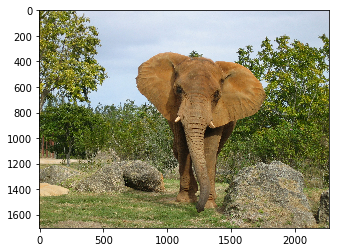

In [93]:
plt.imshow(image)
plt.show()

Models are always expecting images of a certain size, and with intensities around a given values. This is taken care of here:

In [94]:
#adjust image size and dimensions
image_resize = skimage.transform.resize(image,(224,224),preserve_range=True)
x = np.expand_dims(image_resize, axis=0)

#adjust image intensities
x = preprocess_input(x)

## 14.3 Prediction

Finally, we can pass that modified image to the network to give a prediction:

In [96]:
features = model.predict(x)

When we look at the dimensions of the output, we see that we have a vector of 1000 dimensions. Each dimensions corresponds to a category and the value represents the probability that the image contains that category. If we plot the vector we see that the image clearly belong to one category:

In [102]:
features.shape

(1, 1000)

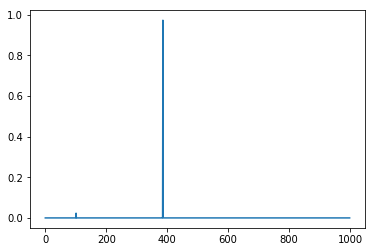

In [103]:
plt.plot(features.T)
plt.show()

We can use the decond function, to know what this category index corresponds to:

In [104]:
decode_predictions(features, top=1000)

[[('n02504458', 'African_elephant', 0.97247905),
  ('n01871265', 'tusker', 0.023192732),
  ('n02504013', 'Indian_elephant', 0.0042007365),
  ('n02437312', 'Arabian_camel', 9.951144e-05),
  ('n02100583', 'vizsla', 6.8087825e-06),
  ('n02099849', 'Chesapeake_Bay_retriever', 2.5692093e-06),
  ('n03124170', 'cowboy_hat', 1.1540182e-06),
  ('n01704323', 'triceratops', 1.0709548e-06),
  ('n02389026', 'sorrel', 1.0571622e-06),
  ('n02422106', 'hartebeest', 8.660342e-07),
  ('n02096051', 'Airedale', 7.121847e-07),
  ('n02090379', 'redbone', 6.949403e-07),
  ('n02087394', 'Rhodesian_ridgeback', 6.5833603e-07),
  ('n04604644', 'worm_fence', 5.91258e-07),
  ('n02092339', 'Weimaraner', 5.7366736e-07),
  ('n03124043', 'cowboy_boot', 5.6223644e-07),
  ('n01688243', 'frilled_lizard', 4.896954e-07),
  ('n03697007', 'lumbermill', 3.8739722e-07),
  ('n03404251', 'fur_coat', 3.7333447e-07),
  ('n04350905', 'suit', 3.6049795e-07),
  ('n04259630', 'sombrero', 3.3618934e-07),
  ('n04399382', 'teddy', 3.2949

The three best categories are three categories of different elephants, but the best one is indeed the African one.

## 14.4 Image with multiple content

What happens if multiple objects are in an image like here a dog and a cat or a banana and strawberries?

In [135]:
#image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/0/07/Chien-lit_%26_Chat-en-lit.jpg')
image = skimage.io.imread('https://live.staticflickr.com/3652/3295428010_9284075e7b_b.jpg')

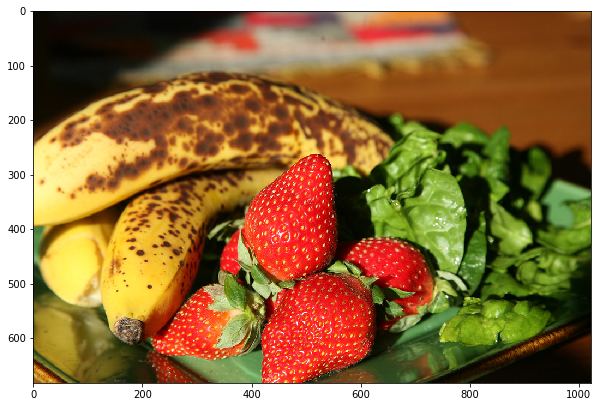

In [136]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

We preprocess the image and do the prediction:

In [137]:
model = VGG16(weights='imagenet', include_top=True)
#model = Xception(weights='imagenet', include_top=True)

image_resize = skimage.transform.resize(image,(224,224),preserve_range=True)
x = np.expand_dims(image_resize, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [138]:
decode_predictions(features, top=1000)

[[('n07753592', 'banana', 0.57612467),
  ('n07745940', 'strawberry', 0.19425777),
  ('n07753275', 'pineapple', 0.052171346),
  ('n07614500', 'ice_cream', 0.03027892),
  ('n07749582', 'lemon', 0.015831836),
  ('n07760859', 'custard_apple', 0.012895137),
  ('n07753113', 'fig', 0.011580517),
  ('n07747607', 'orange', 0.009989424),
  ('n04476259', 'tray', 0.009962718),
  ('n07579787', 'plate', 0.006886375),
  ('n07718472', 'cucumber', 0.0063871946),
  ('n04332243', 'strainer', 0.0054645366),
  ('n07768694', 'pomegranate', 0.005452069),
  ('n07836838', 'chocolate_sauce', 0.003862606),
  ('n07742313', 'Granny_Smith', 0.0028679578),
  ('n04597913', 'wooden_spoon', 0.0027667896),
  ('n03461385', 'grocery_store', 0.002693231),
  ('n07716358', 'zucchini', 0.0026920459),
  ('n07613480', 'trifle', 0.0022338617),
  ('n07583066', 'guacamole', 0.002175739),
  ('n03089624', 'confectionery', 0.0013857636),
  ('n07932039', 'eggnog', 0.0013704571),
  ('n04204238', 'shopping_basket', 0.0013690275),
  ('n0

We end up with probabilitis split among multiple categories of a certain "style" like multiple dog breeds. One way to try improving on this, is to use this classifier to do an approximative segmentation by splitting the image into subregions.

We create overlapping patches and do the prediction on those:

In [139]:
patch = 400
step = 100
all_features =[]
for i in np.arange(0,image.shape[0]-patch-1,step):
    print(i)
    for j in np.arange(0,image.shape[1]-patch-1,step):
        subimage = image[i:i+patch,j:j+patch,:]
        image_resize = skimage.transform.resize(subimage,(224,224),preserve_range=True)
        x = np.expand_dims(image_resize, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        all_features.append(features)
    

0
100
200


In [140]:
[decode_predictions(x, top=1000)[0][0] for x in all_features if decode_predictions(x, top=1000)[0][0][2]>0.3]

[('n07753592', 'banana', 0.7876999),
 ('n07753592', 'banana', 0.47260663),
 ('n07753592', 'banana', 0.5114513),
 ('n07745940', 'strawberry', 0.6835811),
 ('n07745940', 'strawberry', 0.81029123),
 ('n07745940', 'strawberry', 0.92421716),
 ('n07753592', 'banana', 0.8903582),
 ('n07753592', 'banana', 0.7702214),
 ('n07753592', 'banana', 0.8909379),
 ('n07745940', 'strawberry', 0.9785351),
 ('n07745940', 'strawberry', 0.9900946),
 ('n07745940', 'strawberry', 0.98152024),
 ('n07745940', 'strawberry', 0.7820025),
 ('n07753592', 'banana', 0.98062783),
 ('n07753592', 'banana', 0.80547607),
 ('n07745940', 'strawberry', 0.69026935),
 ('n07745940', 'strawberry', 0.99909794),
 ('n07745940', 'strawberry', 0.99729496),
 ('n07745940', 'strawberry', 0.9918213),
 ('n07745940', 'strawberry', 0.4741534)]

We can now superpose those segmented features over the original image:

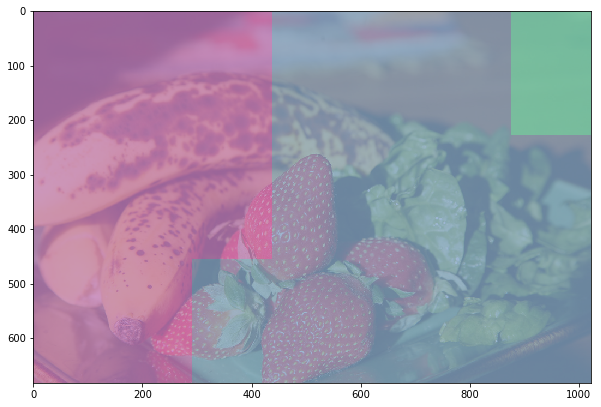

In [141]:
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))

reshaped = np.reshape([np.argmax(x) for x in all_features],
                      (len(np.arange(0,image.shape[0]-patch-1,step)),len(np.arange(0,image.shape[1]-patch-1,step))))

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.imshow(skimage.transform.resize(reshaped,(image.shape[0],image.shape[1]), order=0,preserve_range=True),cmap = cmap,alpha = 0.8)
plt.show()

Let's create an array with the index names and plot them on top of the image:

In [144]:
names = np.reshape([decode_predictions(x, top=1000)[0][0][1] for x in all_features],
          (len(np.arange(0,image.shape[0]-patch-1,step)),len(np.arange(0,image.shape[1]-patch-1,step))))

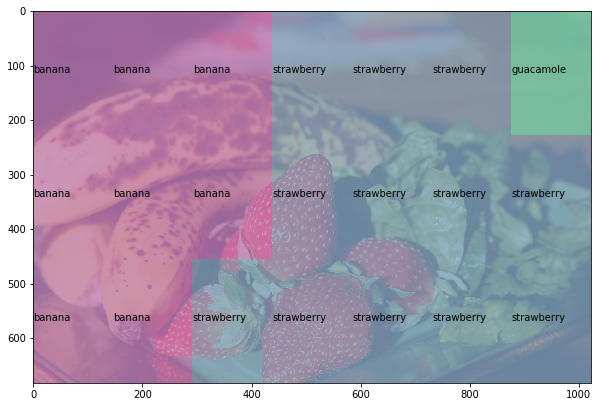

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.imshow(skimage.transform.resize(reshaped,(image.shape[0],image.shape[1]), order=0,preserve_range=True),cmap = cmap,alpha = 0.8)
fact = image.shape[0]/reshaped.shape[0]
for x in range(names.shape[0]):
    for y in range(names.shape[1]):
        plt.text(x=(y)*image.shape[1]/reshaped.shape[1],y=(x+0.5)*image.shape[0]/reshaped.shape[0],s = names[x,y])
plt.show()